In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

In [2]:
df_olx_medallo = pd.read_csv('../documentos/olx_medellin.csv')

In [4]:
# Importación de datos mediante seaborn
df_iris = sns.load_dataset('iris')
df_fmri = sns.load_dataset('fmri')

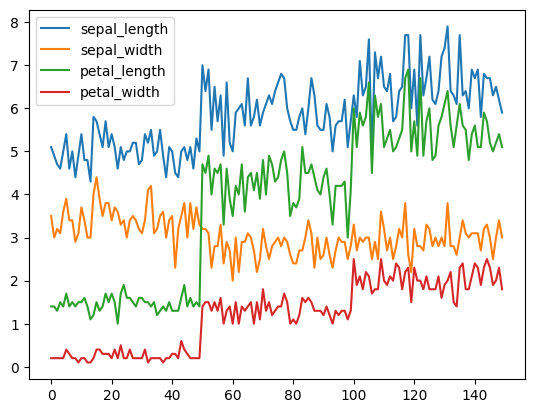

In [5]:
# Todas las columnas numéricas
#plt.figure(figsize=(20, 5))
df_iris.plot()
plt.show()

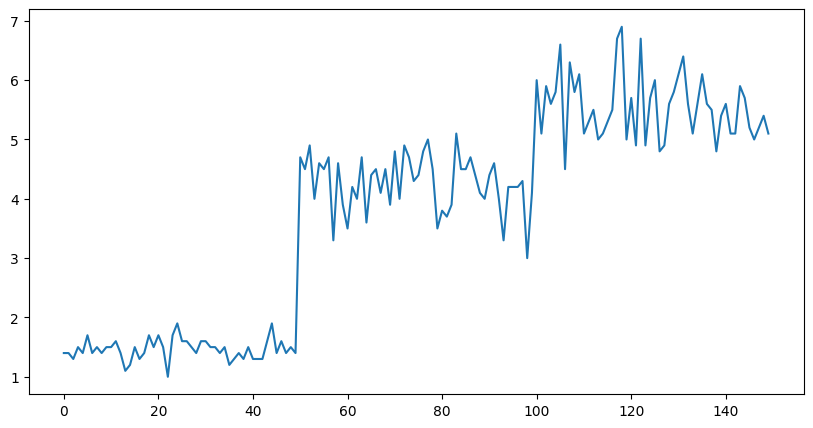

In [ ]:
###
# 1 Atributo
###
plt.figure(figsize=(10, 5))
df_iris['petal_length'].plot()
plt.show()

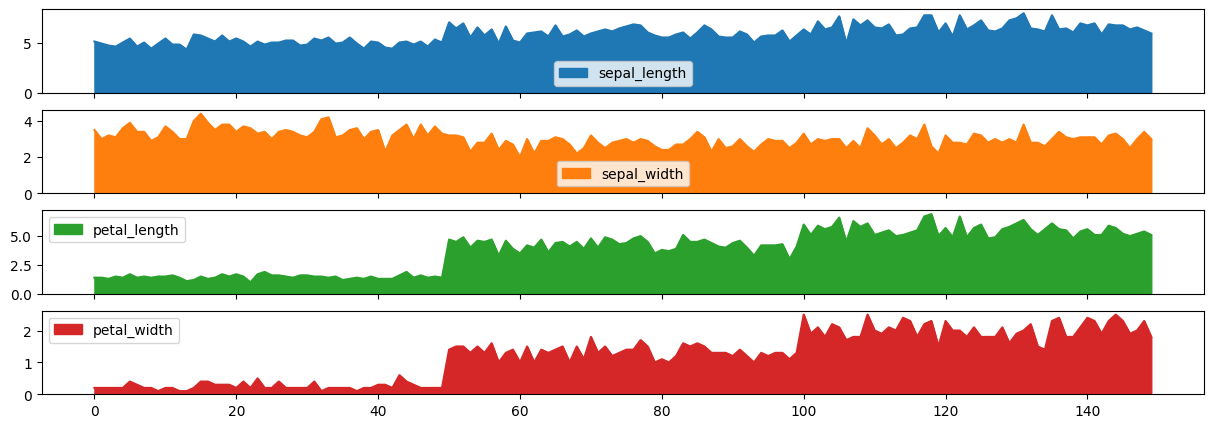

In [ ]:
###
# Subplots - Áreas
###
axs = df_iris.plot.area(figsize=(15, 5), subplots=True)
plt.show()

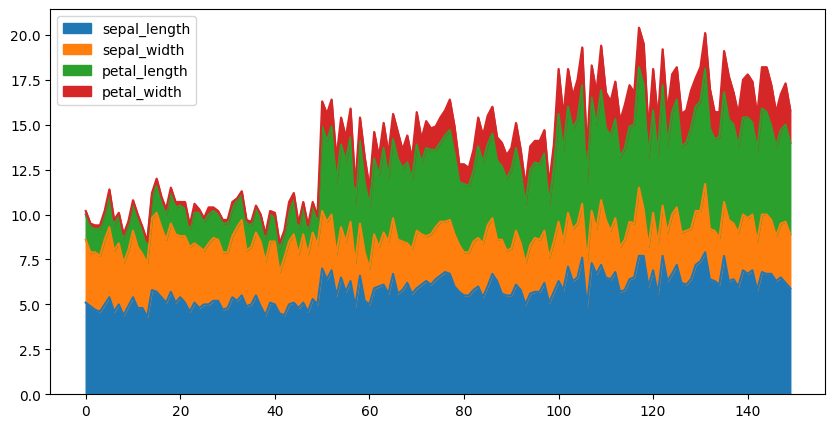

In [ ]:
###
# Subplots - Áreas combinadas
###
fig, axs = plt.subplots(figsize=(10, 5))
df_iris.plot.area(ax= axs)
plt.show()

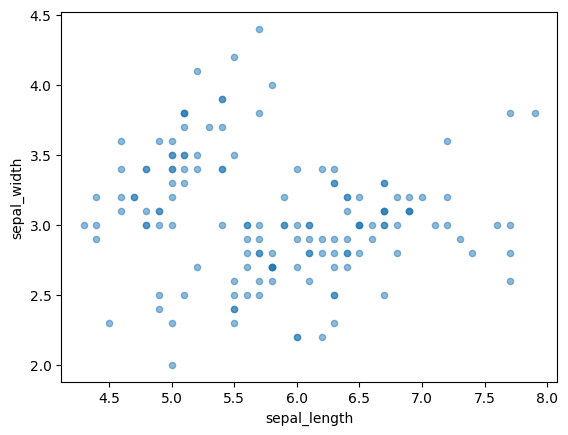

In [9]:
###
#
###
df_iris.plot.scatter(x='sepal_length', y='sepal_width', alpha=0.5)
plt.show()

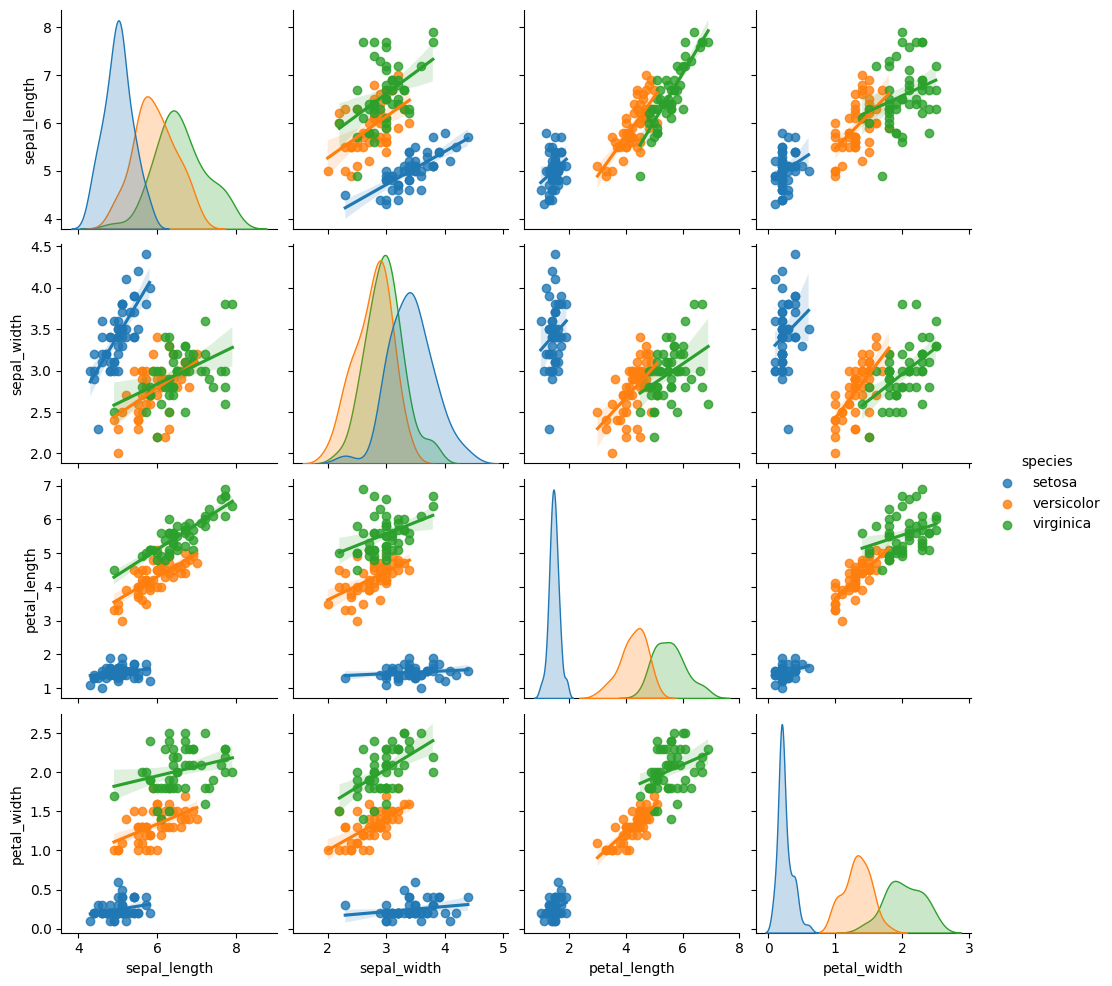

In [10]:
###
# Diagramas de pares
###
sns.pairplot(df_iris, hue='species', kind='reg') # kind: kde, hist, reg
plt.show()

In [3]:
# Datos: olx_Medellin
# Columnas: Categóricas y numéricas
columnas = list(df_olx_medallo.keys())
cols_categ = [x for x in columnas if df_olx_medallo[x].dtype == 'object']
cols_num = [x for x in columnas if df_olx_medallo[x].dtype != 'object']

<function matplotlib.pyplot.show(close=None, block=None)>

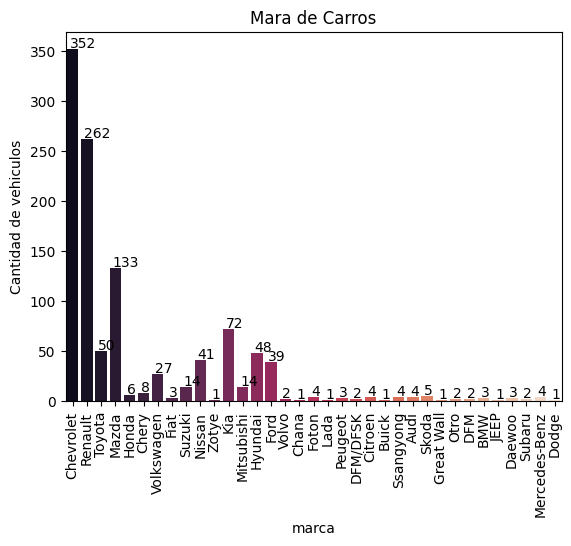

In [14]:
plt.Figure(figsize=(10,5))
ax = sns.countplot(x='marca', data=df_olx_medallo, hue='marca', palette='rocket')
plt.title('Mara de Carros')
plt.ylabel('Cantidad de vehiculos')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + (p.get_width()/4), p.get_height()+2))
plt.show

In [ ]:
['marca',
 'linea',
 'condición',
 'combustible',
 'color',
 'transmisión',
 'único_dueño',
 'tipo_de_vendedor']

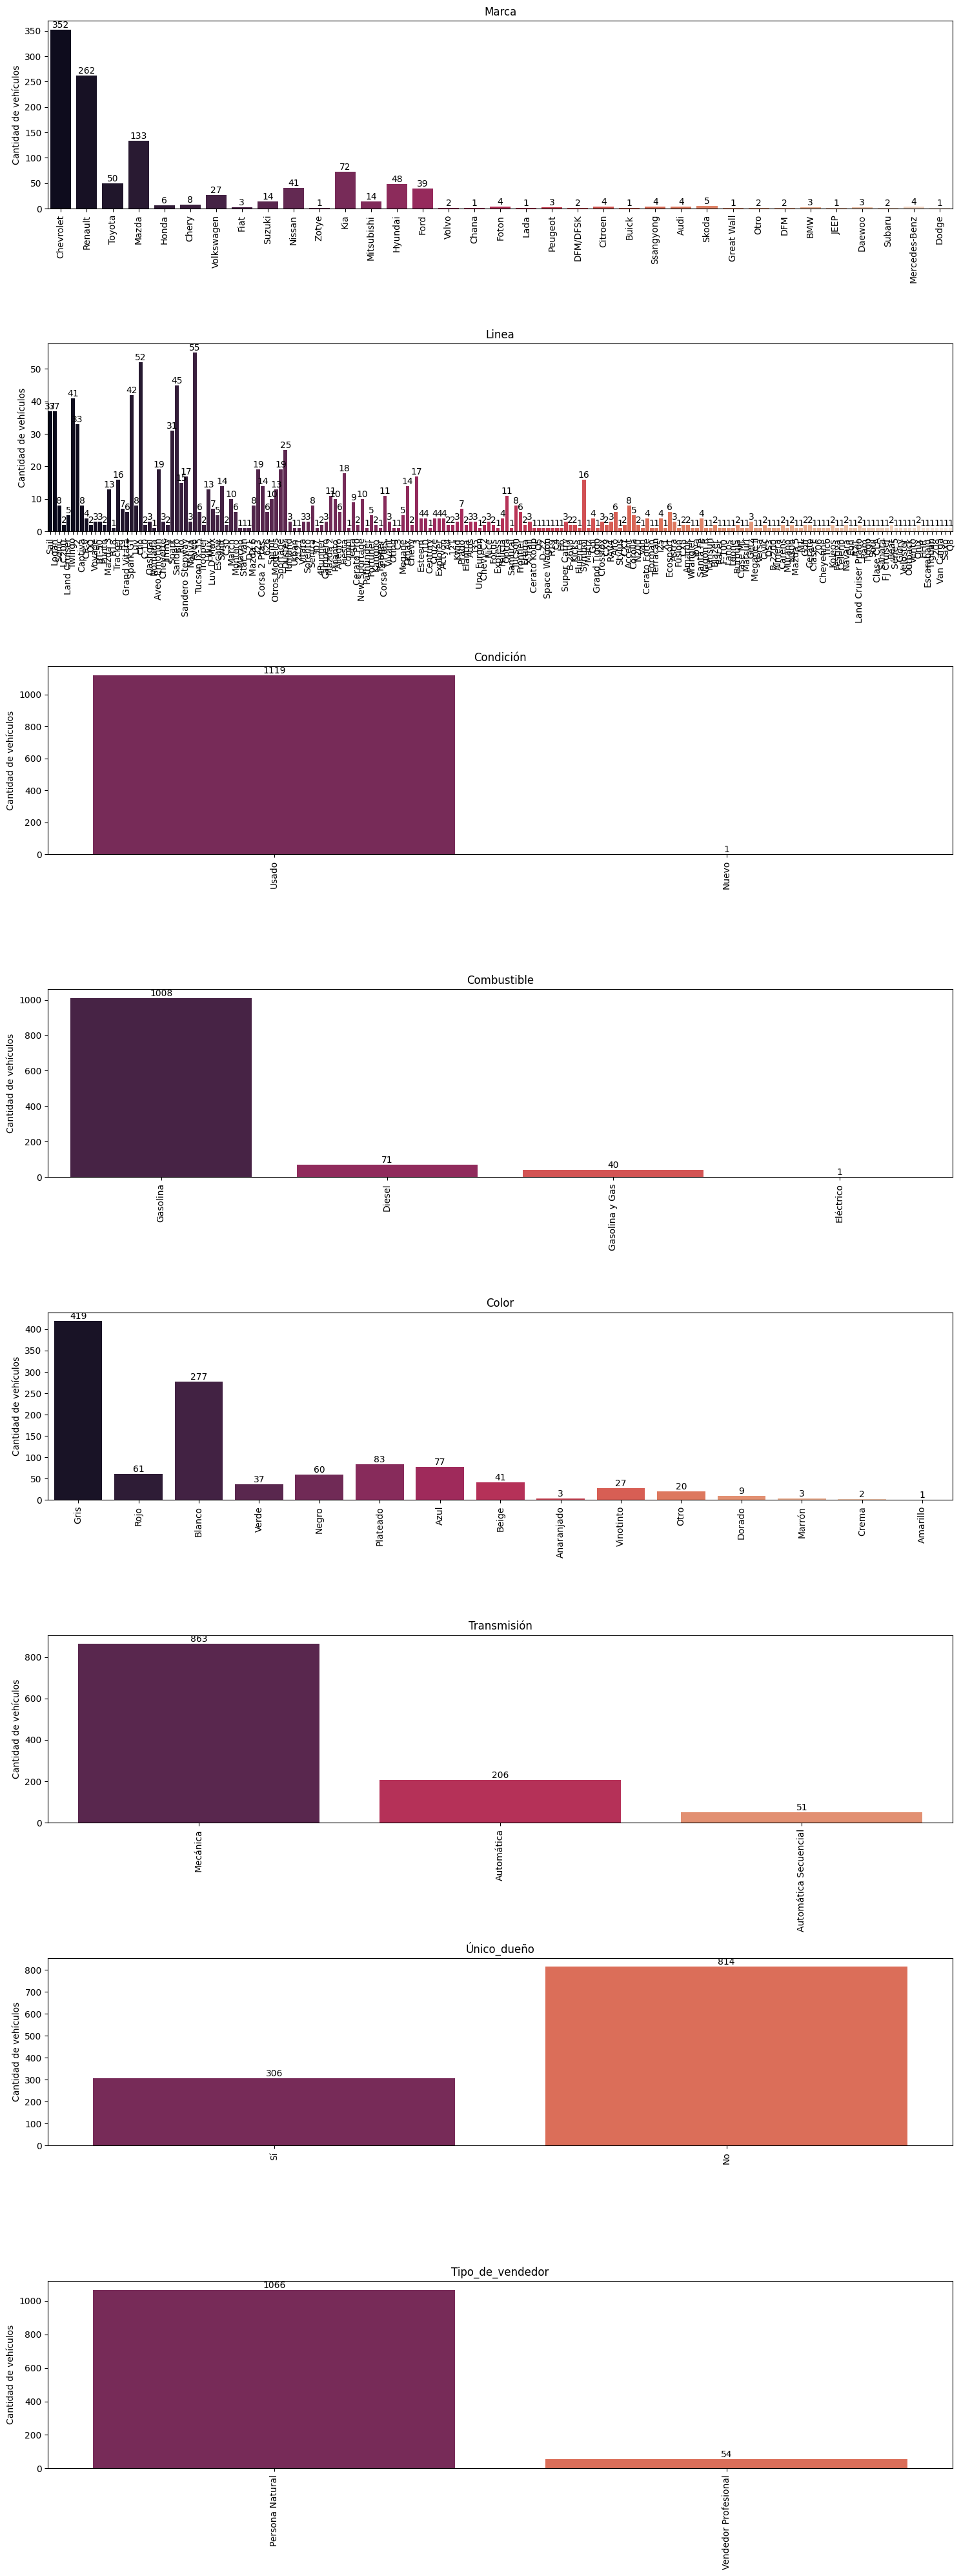

In [ ]:
###
# Mi solución
###

cols_graficar = [
    'marca',
    'linea',
    'condición',
    'combustible',
    'color',
    'transmisión',
    'único_dueño',
    'tipo_de_vendedor'
]

n_cols = 1  # columnas de subplots
n_rows = (len(cols_graficar) + n_cols - 1) // n_cols  # filas necesarias
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*5))
axes = axes.flatten()  # para iterar más fácil

for i, col in enumerate(cols_graficar):
    ax = axes[i]
    sns.countplot(x=col, data=df_olx_medallo, hue=col, palette='rocket', ax=ax)
    ax.set_title(col.capitalize())
    ax.set_ylabel('Cantidad de vehículos')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=90)

    for p in ax.patches:
        ax.annotate(
            int(p.get_height()), 
            (p.get_x() + p.get_width()/2, p.get_height()), 
            ha='center', va='bottom'
        )

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

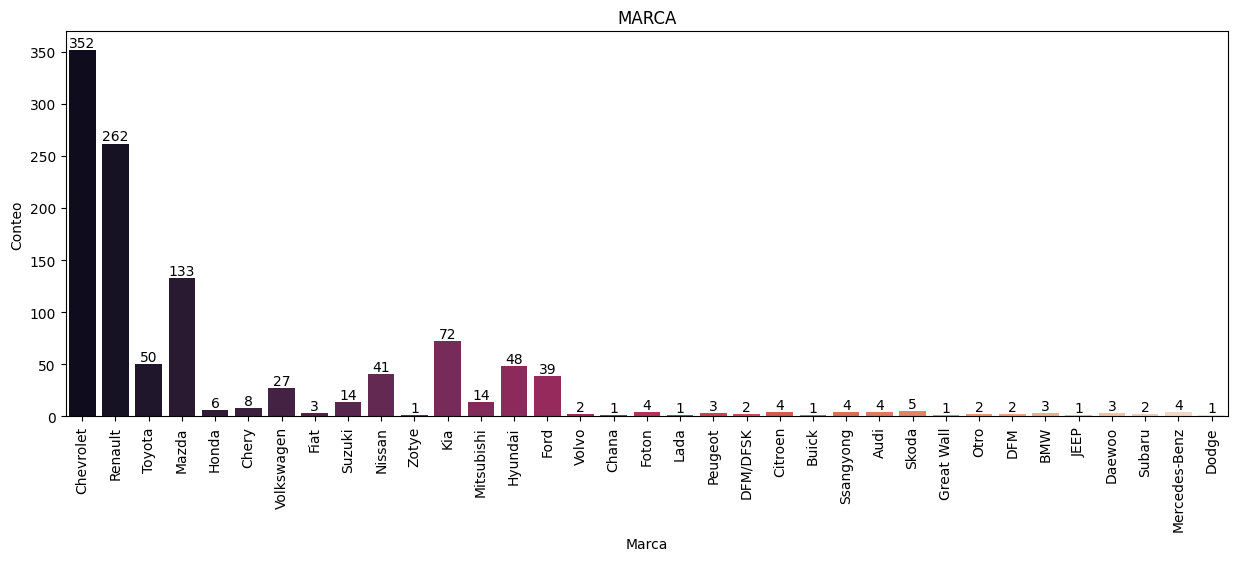

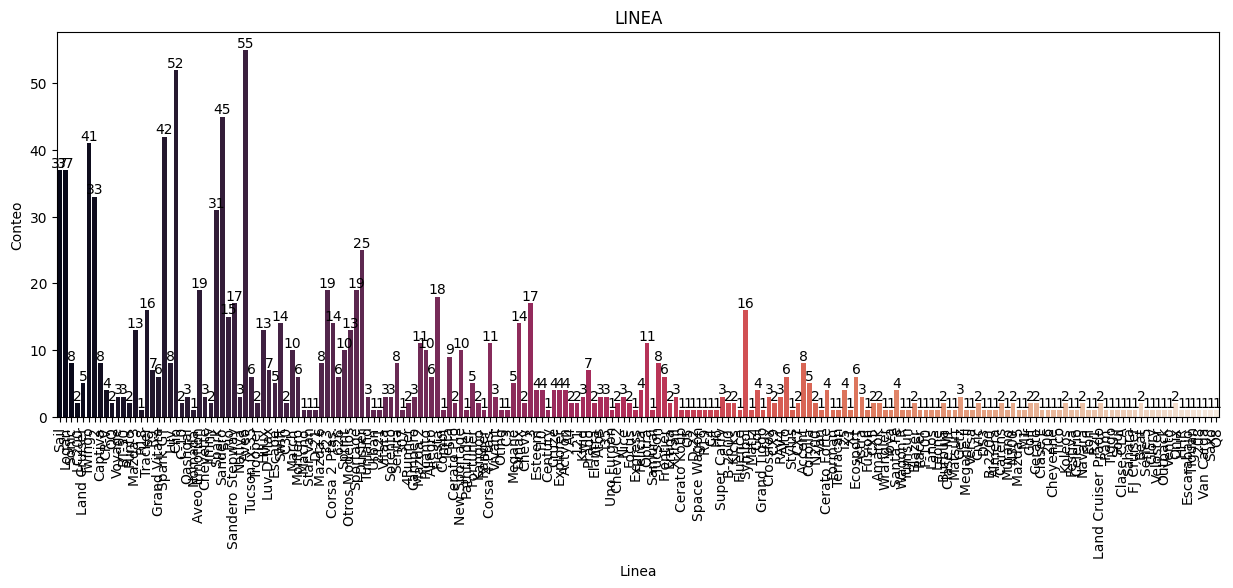

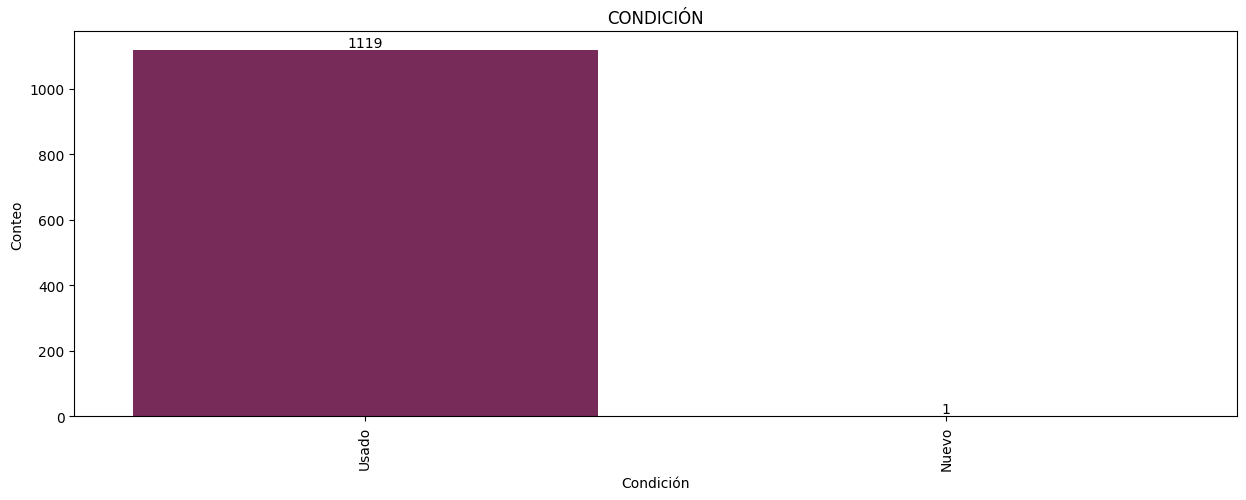

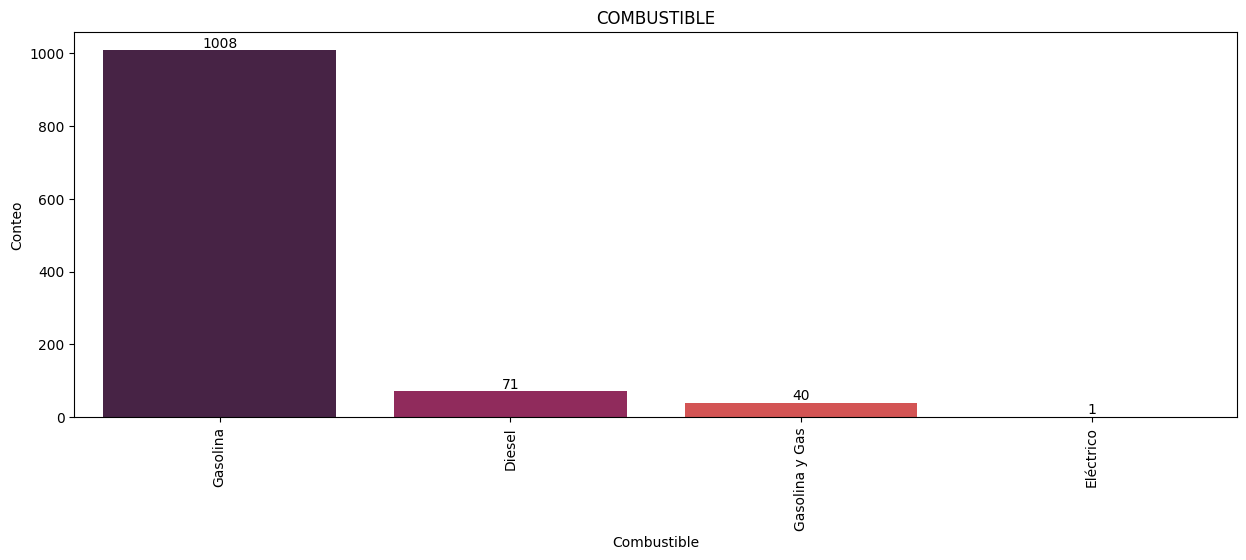

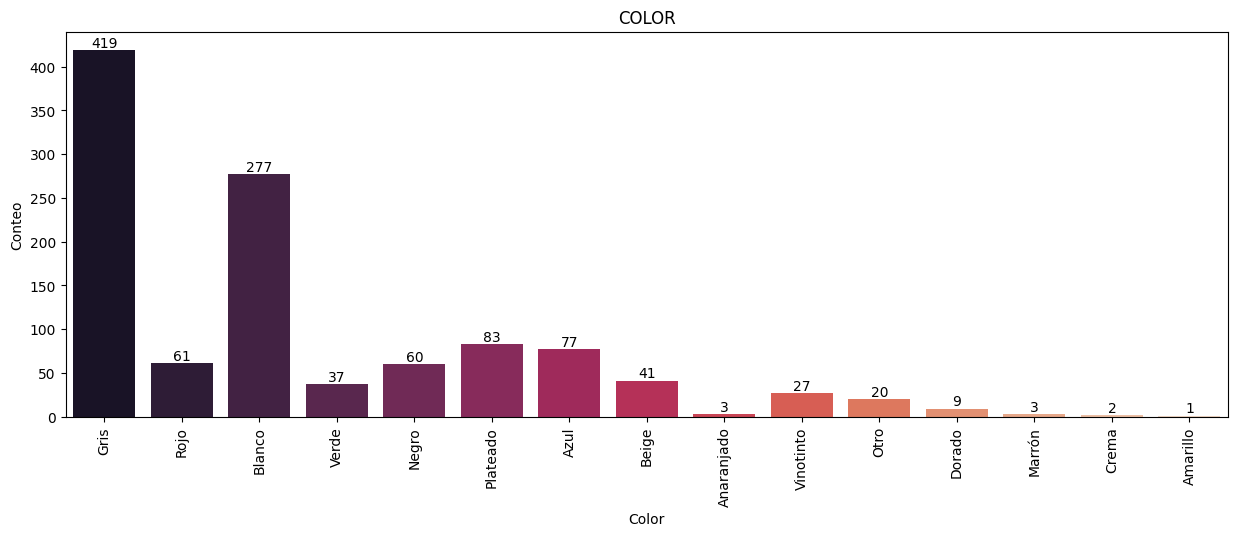

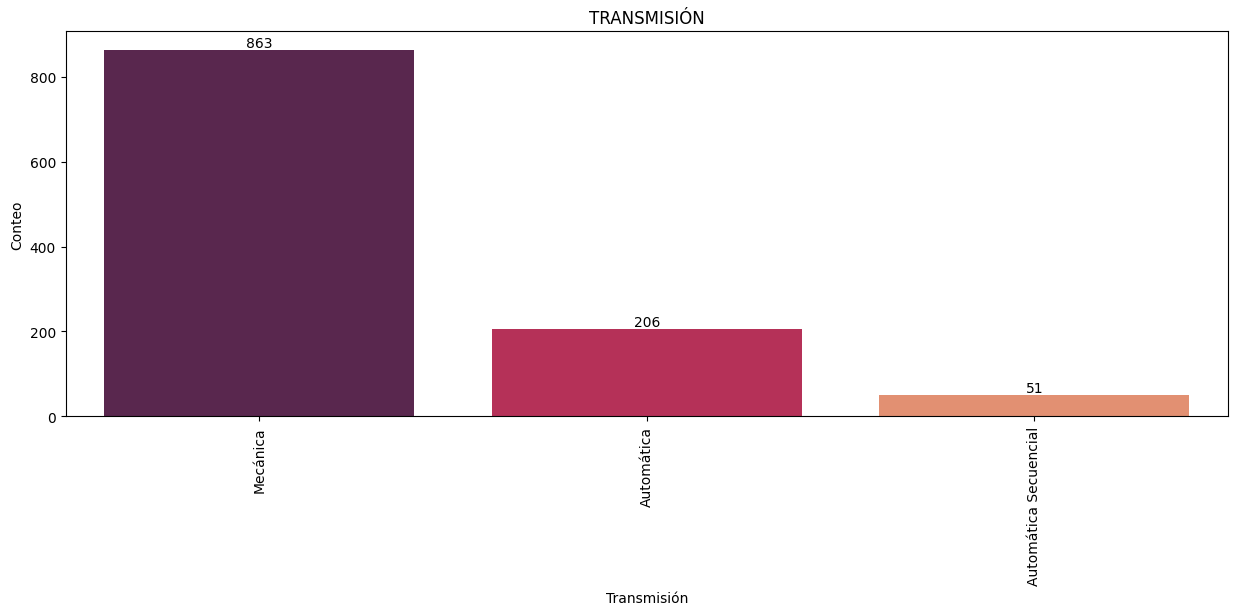

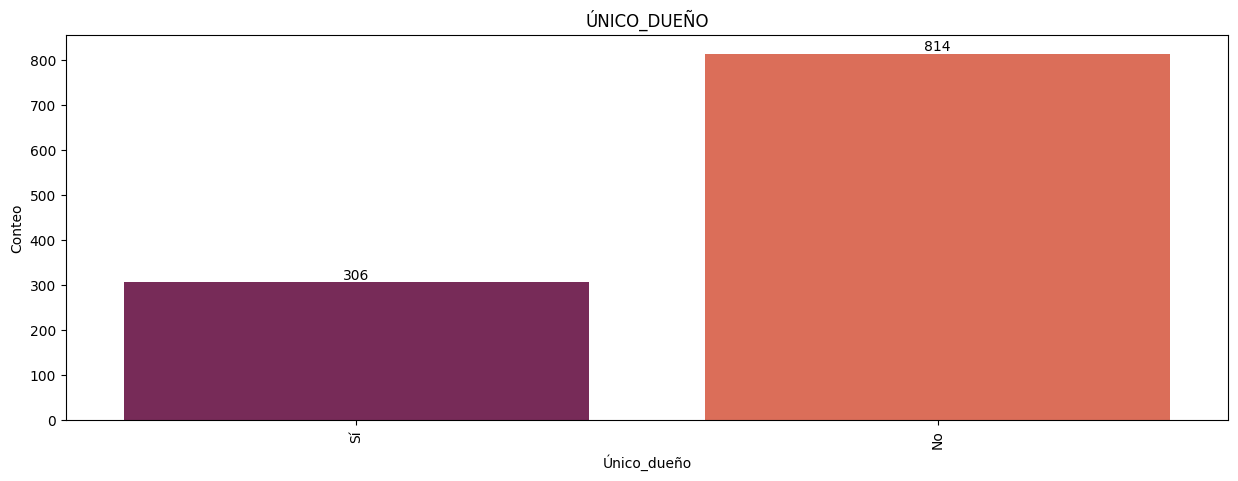

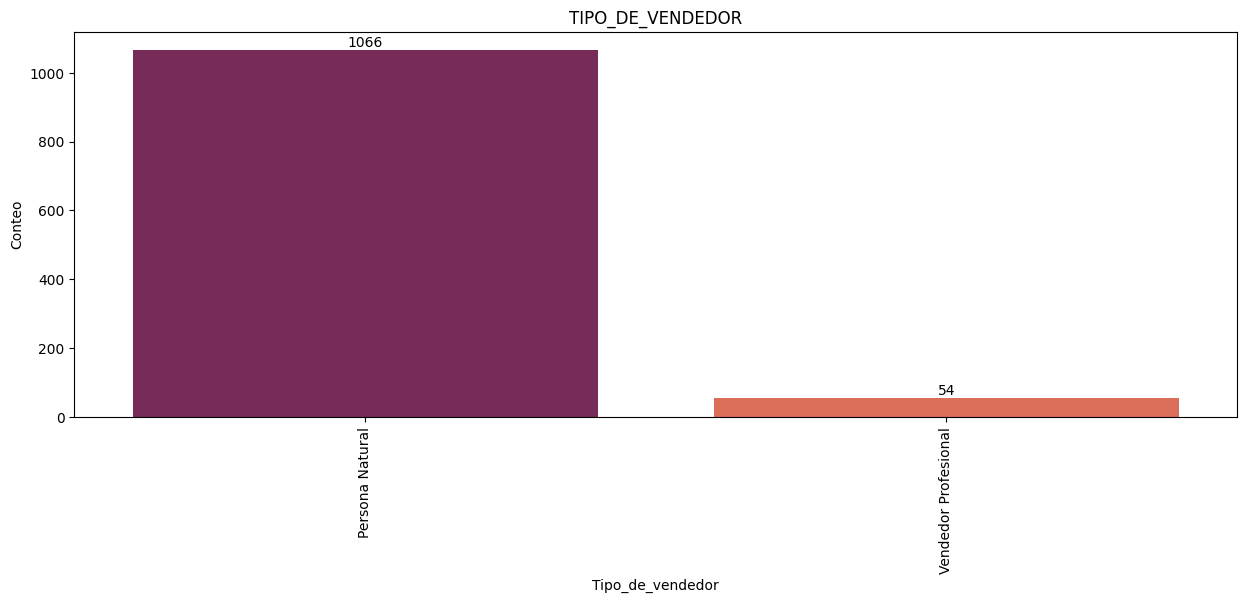

In [ ]:
###
# Solución del profe
###


columnas = list(df_olx_medallo.keys())
cols_categ = [x for x in columnas if df_olx_medallo[x].dtype == 'object']
cols_num = [x for x in columnas if df_olx_medallo[x].dtype != 'object']

for col in cols_categ:
  plt.figure(figsize=(15, 5))
  ax = sns.countplot(x=col, data=df_olx_medallo, hue=col, palette='rocket')
  plt.title(col.upper())
  plt.xlabel(col.capitalize())
  plt.ylabel('Conteo')
  plt.xticks(rotation=90)
  for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+(p.get_width()/2), p.get_height()), ha='center', va='bottom')
  plt.show()

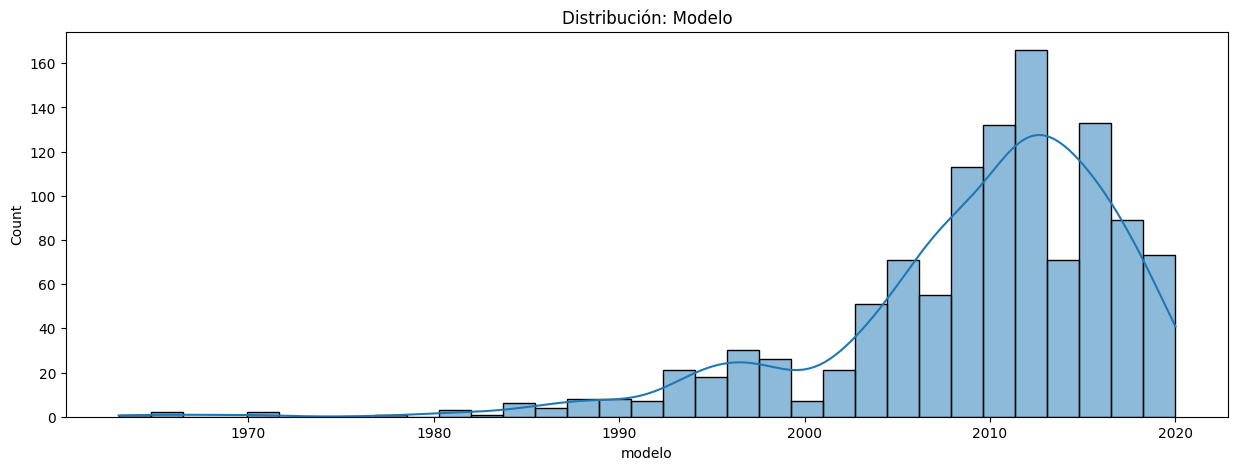

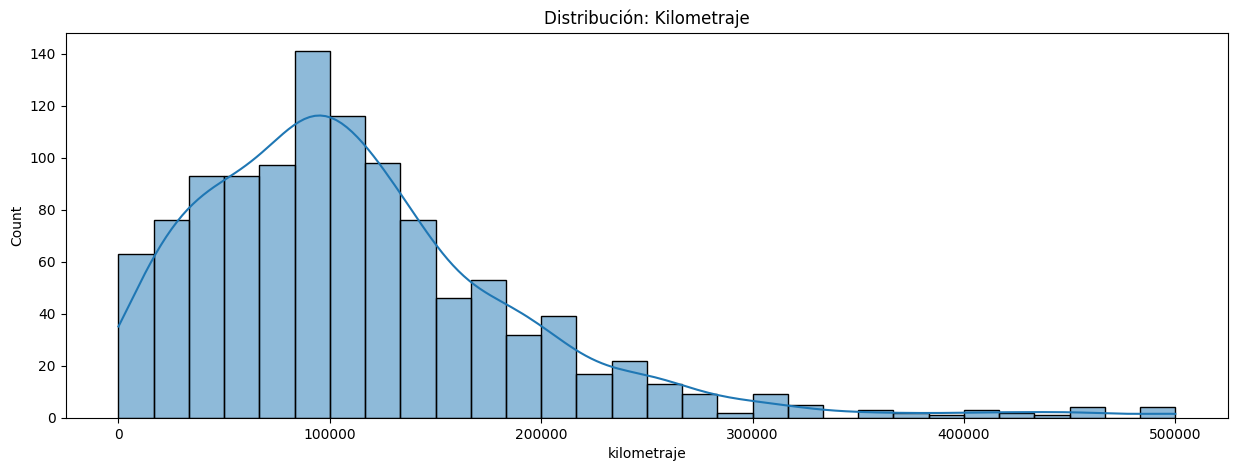

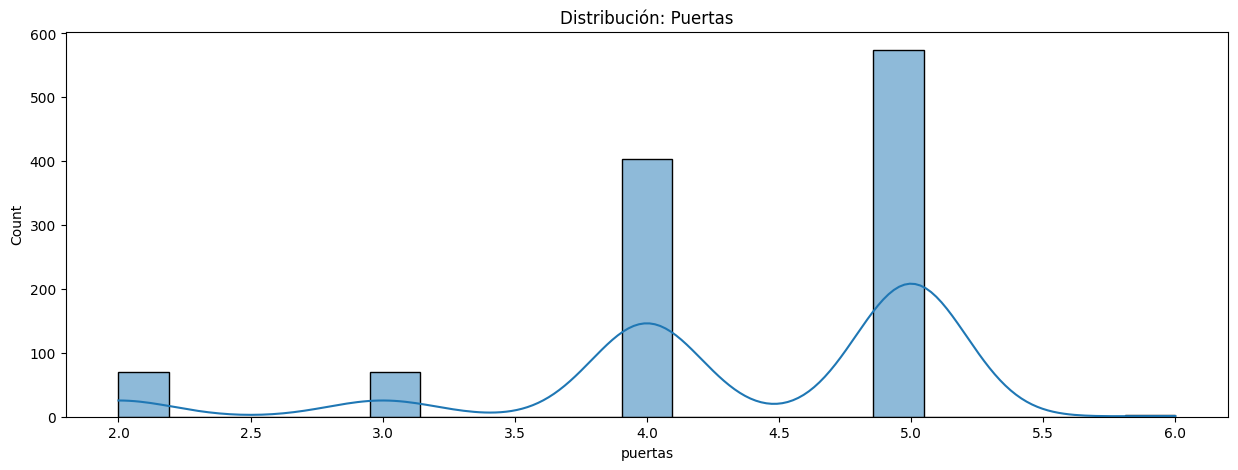

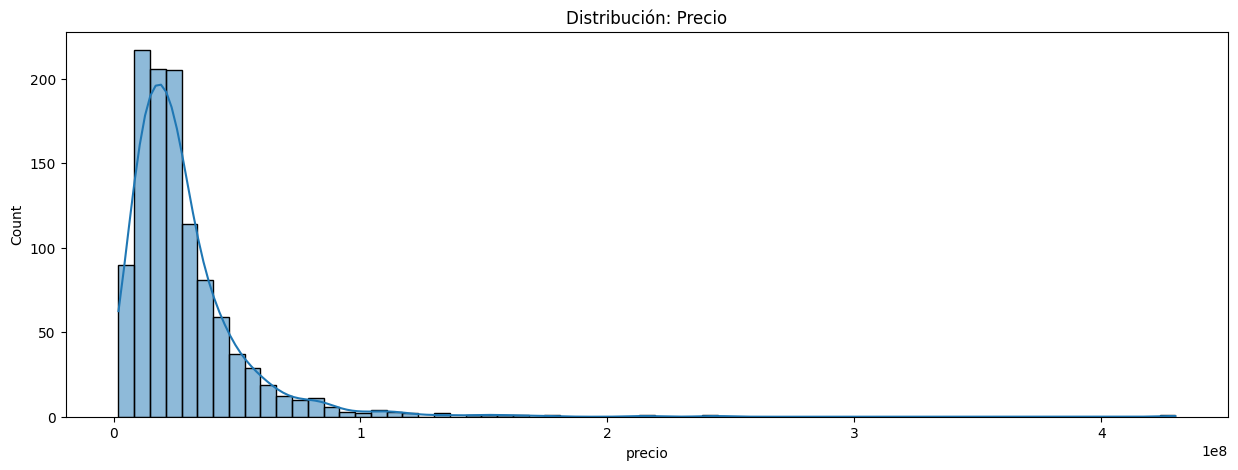

In [27]:
###
# Graficas de distribución
###

for col in cols_num:
  plt.figure(figsize=(15, 5))
  sns.histplot(x=col, data=df_olx_medallo, kde=True)        # kde Genera una curva que sigue la distribución
  plt.title(f'Distribución: {col.capitalize()}')
  plt.show()

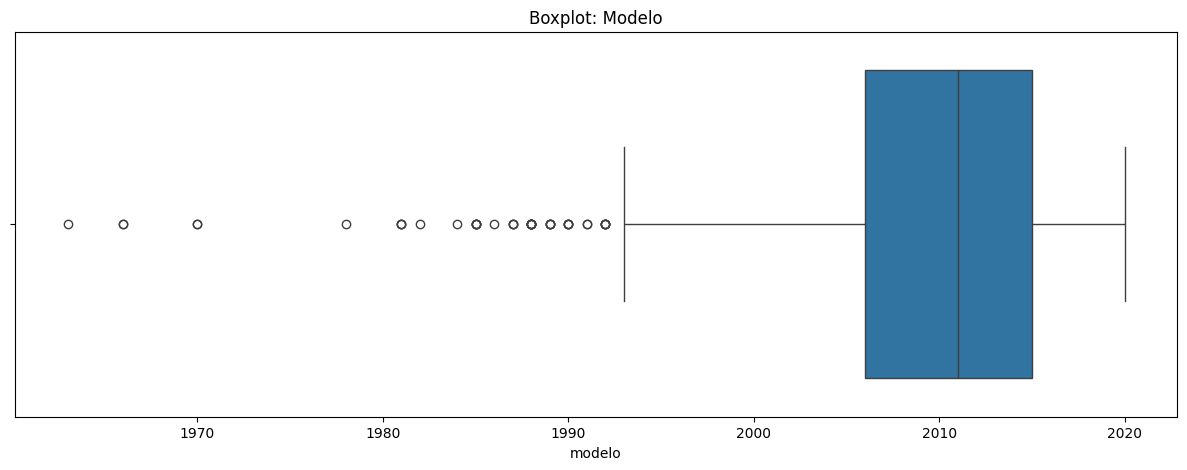

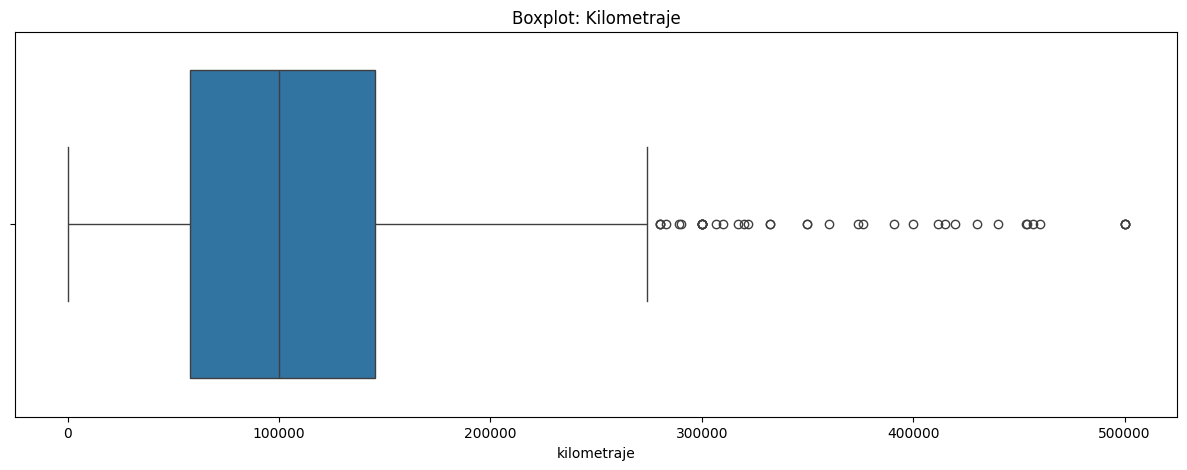

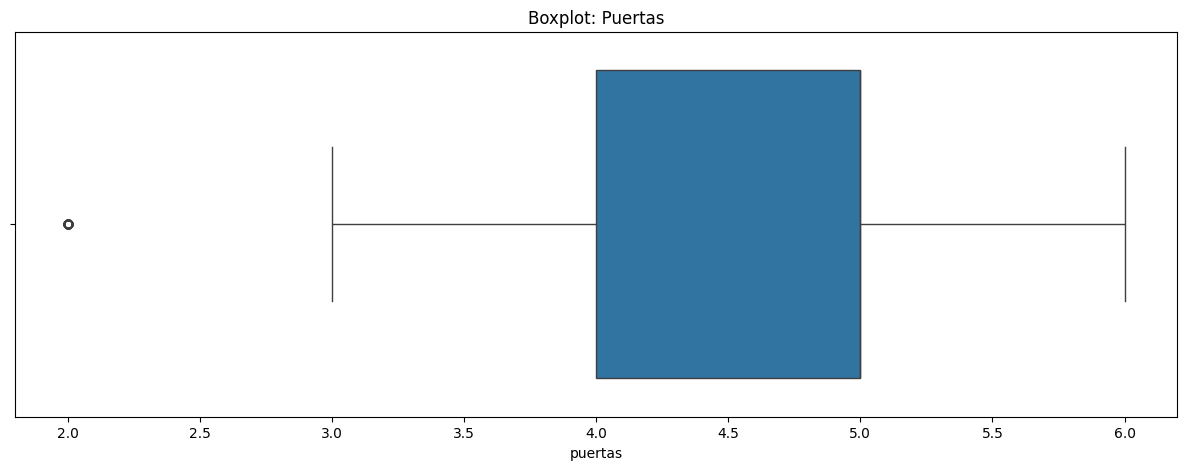

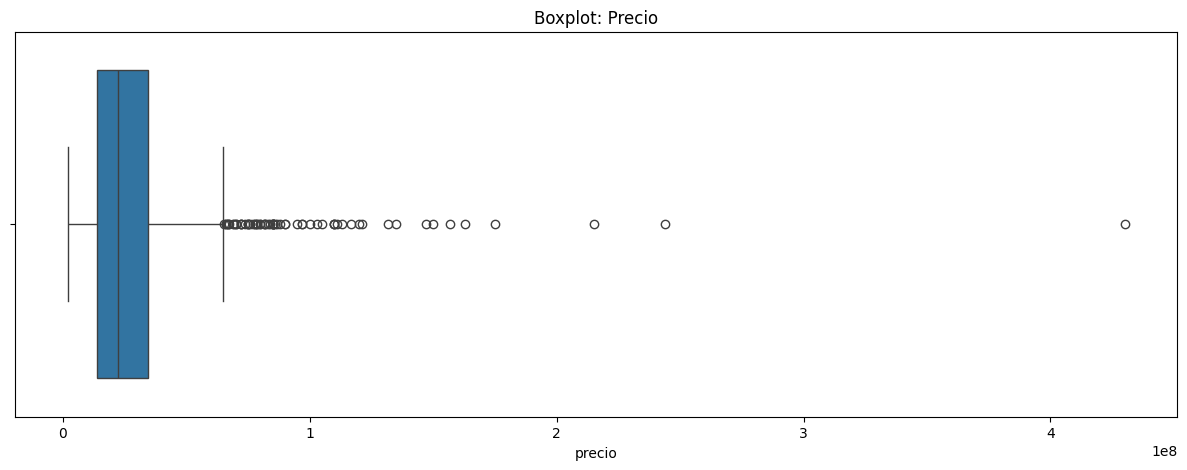

In [29]:
###
# Graficas de Boxplot
###

for col in cols_num:
  plt.figure(figsize=(15, 5))
  sns.boxplot(x=col, data=df_olx_medallo)        # kde Genera una curva que sigue la distribución
  plt.title(f'Boxplot: {col.capitalize()}')
  plt.show()

In [30]:
df_galicia = pd.read_csv('https://raw.githubusercontent.com/R-CoderDotCom/data/main/sample_datasets/population_galicia.csv')

fig = px.density_mapbox(df_galicia, lat = 'latitude', lon = 'longitude', z = 'tot_pob',
                        radius = 8,
                        center = dict(lat = 42.83, lon = -8.35),
                        zoom = 7,
                        mapbox_style = 'open-street-map')
fig.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12444\1470376583.py:3: DeprecationWarning: *density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.density_mapbox(df_galicia, lat = 'latitude', lon = 'longitude', z = 'tot_pob',


In [31]:
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title=dict(text='Mt Bruno Elevation'), autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

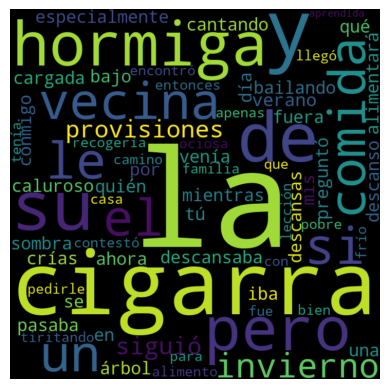

In [34]:
texto = (
'''
Un verano especialmente caluroso, una cigarra descansaba bajo la sombra de un árbol. Se pasaba el día cantando y bailando,
mientras su vecina la hormiga iba y venía cargada de comida.
—¿Por qué no descansas conmigo, vecina? —le preguntó la cigarra.
—Si descanso ahora, ¿quién alimentará a mis crías en invierno? Si fuera tú, recogería provisiones.
Pero la cigarra siguió ociosa. Entonces llegó el frío invierno, y la cigarra no encontró alimento.
Tiritando, fue a casa de la hormiga a pedirle comida. Pero la hormiga le contestó que apenas tenía provisiones
para su familia. Y la pobre cigarra siguió su camino, pero con la lección bien aprendida.
''')

# Crear el objeto de la nube
texto = texto.lower()
wordcloud = WordCloud(width=720, height=720, margin=0).generate(texto)

# Dibujar la nube
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
# Eliminación de basura visual
list_trash = [' un ', ' una ', ' y ', ' a ', ' se ', ' de ', ' la ', ' que ', ' con ', ' el ', ' le ', ' por ', ' en ']
for pal in list_trash:
  texto = texto.replace(pal, ' ')